In [32]:
%matplotlib inline

# Random Walk
This notebook simulates a random walk for some amount of particles. This can be plugged into the FCS notebook to calculate diffusion constants of the random walk particles, as a sanity check.

## Trajectory Attributes

The core object used in the virtual FCS notebook is a Trajectory object.



### `Trajectory.xyz[frame_index, atom_index]`
2-D Numpy array storing tuples of (X,Y,Z) coordinates for each atom `atom_index` at each time step `frame_index`

#### `Trajectory.topology.n_residues`
Integer, number of residues/atoms. Equivalent for this purpose

#### `Trajectory.topology.atoms`
List of `atom` objects. Each `atom` object should have an attribute `atom.index` that's its index in the Trajectory, for use in `Trajectory.xyz`

## Random Walk Parameters

In [33]:
N_WALKERS = 1000

TSTEPS = 50000

D = 8

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from trajectory import Atom, Topology, FakeTrajectory

### Run simulation

In [35]:
%%time
d_scaling = np.sqrt(4*D)

xyz = np.full(shape=(TSTEPS, N_WALKERS, 3), fill_value=[0.0,0.0,0.0])
_RMSD = np.sqrt(TSTEPS * 4 * D)

print(_RMSD)

1264.91106407
CPU times: user 348 ms, sys: 104 ms, total: 452 ms
Wall time: 448 ms


In [36]:
for w in range(N_WALKERS):
    
    xyz[1:,w,0] = np.cumsum(np.cos(np.random.uniform(0,2,TSTEPS-1)*np.pi) * d_scaling )
    xyz[1:,w,1] = np.cumsum(np.sin(np.random.uniform(0,2,TSTEPS-1)*np.pi) * d_scaling )
    
    # Add initial offset
    xyz[:,w,0] += np.random.uniform(-_RMSD,_RMSD)
    xyz[:,w,1] += np.random.uniform(-_RMSD,_RMSD)

## Calculate Diffusion Constant

In [37]:
MSD = np.mean([(xyz[TSTEPS-1,w,0]-xyz[0,w,0])**2 + (xyz[0,w,1] - xyz[TSTEPS-1,w,1])**2 for w in range(N_WALKERS)])

print("MSD should be %f" % np.sqrt(TSTEPS * 4 * D))
print("D is set to %f, calculated at %f" % (D, MSD/(4 * TSTEPS)))

MSD should be 1264.911064
D is set to 8.000000, calculated at 8.259049


In [38]:
xyz[1,1] 
    
print(len(xyz))
t = FakeTrajectory()
t.initialize(xyz, N_WALKERS)

print(len(t.xyz))
print(t.topology.n_residues)
print(t.topology.atoms[3].index)

with open('../../windrive/linux/output.pkl', 'wb') as output:
    import pickle
    pickle.dump(t, output)

# t.reduce(.5)
# len(t)

50000
50000
1000
3


In [39]:
#len(pickle.dumps(t, -1))
# %run fcs_notebook.ipynb

## Plot Walks

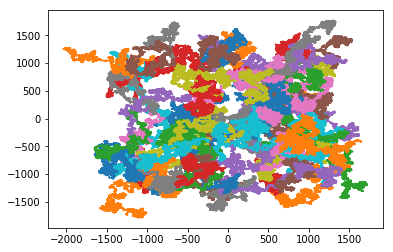

In [40]:
for w in range(0,N_WALKERS, 10):

    plt.plot(xyz[:10000,w,0], xyz[:10000,w,1], linestyle='-')

In [41]:
# import pickle
# t = pickle.load(open('../../windrive/linux/output.pkl', 'rb'))

# for w in range(0,t.topology.n_residues, 10):

#     plt.plot(t.xyz[:10000,w,0], t.xyz[:10000,w,1], linestyle='-')